In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
import pandas as pd 
df  = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
# convert 'Taxable.Income' column to numeric data type
df['Taxable.Income'] = pd.to_numeric(df['Taxable.Income'])


In [ ]:
# Define the target variable
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Good' if x > 30000 else 'Risky')
Y = df['Taxable.Income']
X = df.iloc[:,[0,1,3,4,5]]

In [ ]:

#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Undergrad"] = LE.fit_transform(df["Undergrad"])
df["Marital.Status"] = LE.fit_transform(df["Marital.Status"])
df["Urban"] = LE.fit_transform(df["Urban"])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [ ]:
X = df.iloc[:,[0,1,3,4,5]]
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


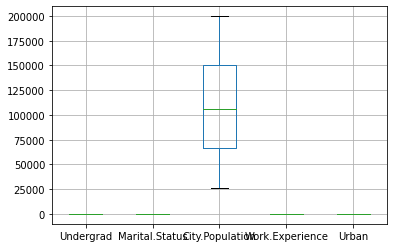

In [ ]:
# create a box plot of all features
import matplotlib.pyplot as plt
X.boxplot()

# show the plot
plt.show()

In [ ]:
#Replacing outliers with median
import numpy as np
for column in X:
    Q1 = np.percentile(X[column], 25)
    Q3 = np.percentile(X[column], 75)
    IQR = Q3 - Q1
    UW = Q3 + (1.5 * IQR)
    LW = Q1 - (1.5 * IQR)
    X[column].copy()[X[column] > UW] = X[column].median()
    X[column].copy()[X[column] < LW] = X[column].median()


In [ ]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 67)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dtcls = DecisionTreeClassifier(criterion = "entropy", max_depth = 8)
dtcls.fit(X_train,Y_train)
Y_Pred_train = dtcls.predict(X_train)
Y_Pred_test = dtcls.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_train = accuracy_score(Y_train,Y_Pred_train)
print("accuracy Score train = ", ac_train.round(3))
ac_test = accuracy_score(Y_test,Y_Pred_test)
print("accuracy Score test= ", ac_test.round(3))


accuracy Score train =  0.843
accuracy Score test=  0.711


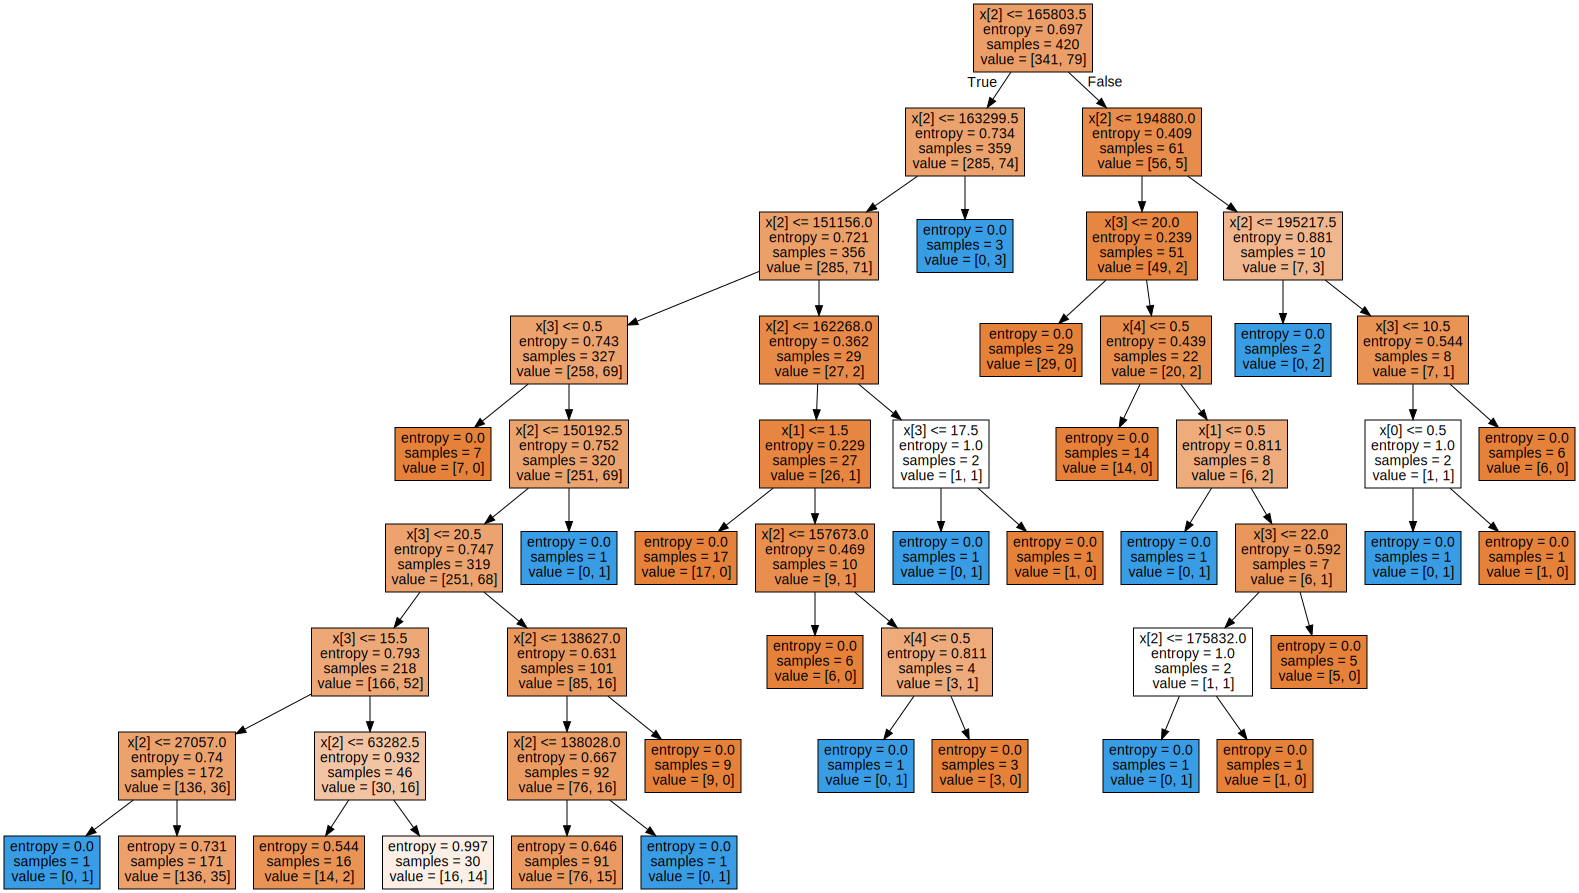

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtcls, filled = True)
graph = graphviz.Source(dot_data)
graph